## Detection of Tomato Leaf Disease by Transfer learning VGG19 

#### Importing libraries and essentials for the model

In [ ]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

##### Data Augmentation

Increasing the data by horizontal flip, shear range and rotation range to get the image classification better accuracy.
Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

##### About Dataset

   1. The dataset consists of training data, validation data, and testing data.
   2. The training data consists of 18345  images with 10 classes and 3,875 test images with 10.
   3. The classes are Tomato___Bacterial_spot, Tomato___Early_blight, Tomato___healthy, Tomato___Late_blight, Tomato___Leaf_Mold, Tomato___Septoria_leaf_spot, Tomato___Spider_mites Two-spotted_spider_mite, Tomato___Target_Spot, Tomato___Tomato_mosaic_virus, Tomato___Tomato_Yellow_Leaf_Curl_Virus.

In [ ]:
training_set=train_datagen.flow_from_directory("C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train",
                                               target_size=(224,224),class_mode="categorical",batch_size=50,shuffle=True)
test_set=test_datagen.flow_from_directory("C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/val",
                                          target_size=(224,224),batch_size=50,class_mode="categorical",shuffle=True)

Found 14529 images belonging to 10 classes.
Found 3631 images belonging to 10 classes.


### VGG19
VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. VGG19 has 19.6 billion FLOPs

![image.png](attachment:image.png)

In [ ]:
vgg19=VGG19(include_top=False,weights="imagenet",input_shape=[224,224,3])

**We will not train the layers because the layers of VGG19 layers are already trained with imagenet dataset.** 

In [ ]:
for layer in vgg19.layers:
  layer.trainable=False

In [ ]:
folder=glob("C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train/*")
folder

['C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Bacterial_spot',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Early_blight',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___healthy',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Late_blight',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Leaf_Mold',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Septoria_leaf_spot',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Target_Spot',
 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/train\\Tomato___Tomato_mosaic_virus',
 'C:/Users/raghw/

**Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax**

**Then we will concat the model and name vgg19_model**

In [ ]:
x=Flatten()(vgg19.output)
pred_vgg19=Dense(units=len(folder),activation="softmax")(x)
vgg19_model=Model(inputs=vgg19.input,outputs=pred_vgg19)

**We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy**

In [ ]:
vgg19_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Final Architecture

In [ ]:
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Train the model with an epoch of 20 and the validation data will be the test data**

In [ ]:
transfer_vgg19=vgg19_model.fit_generator(training_set,validation_data=test_set,epochs=15,
                                         validation_steps=len(test_set),steps_per_epoch=len(training_set))

C:\Users\raghw\AppData\Local\Temp/ipykernel_14668/1967310499.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  transfer_vgg19=vgg19_model.fit_generator(training_set,validation_data=test_set,epochs=15,


Epoch 1/15
291/291 [==============================] - 6156s 21s/step - loss: 0.6994 - accuracy: 0.7819 - val_loss: 0.4700 - val_accuracy: 0.8381
Epoch 2/15
291/291 [==============================] - 9911s 34s/step - loss: 0.3388 - accuracy: 0.8861 - val_loss: 0.3403 - val_accuracy: 0.8805
Epoch 3/15
291/291 [==============================] - 6633s 23s/step - loss: 0.2711 - accuracy: 0.9101 - val_loss: 0.3123 - val_accuracy: 0.8882
Epoch 4/15
291/291 [==============================] - 5951s 20s/step - loss: 0.1886 - accuracy: 0.9382 - val_loss: 0.2546 - val_accuracy: 0.9097
Epoch 5/15
291/291 [==============================] - 8971s 31s/step - loss: 0.1620 - accuracy: 0.9460 - val_loss: 0.3076 - val_accuracy: 0.8956
Epoch 6/15
291/291 [==============================] - 8665s 30s/step - loss: 0.1396 - accuracy: 0.9522 - val_loss: 0.2884 - val_accuracy: 0.8973
Epoch 7/15
291/291 [==============================] - 6965s 24s/step - loss: 0.1139 - accuracy: 0.9617 - val_loss: 0.2184 - val_ac

After the training I have noticed that the model is not **overfit and the loss and accuracy is somewhat equal to validation loss and validation accuracy.**

Which means the model will perform good

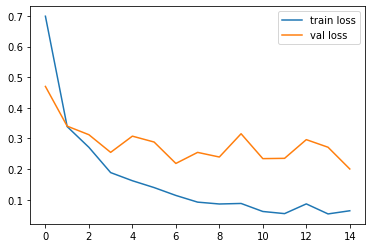

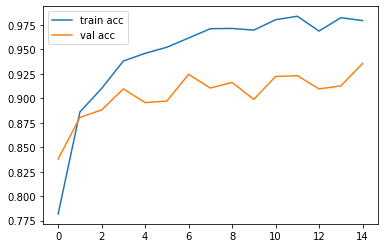

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(transfer_vgg19.history['loss'], label='train loss')
plt.plot(transfer_vgg19.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg19.history['accuracy'], label='train acc')
plt.plot(transfer_vgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Prediction

In [ ]:
y_pred_vgg19=vgg19_model.predict(test_set)

73/73 [==============================] - 1267s 17s/step


**The predicted output is a probability due to the activation funtion Softmax, it returns probability of the classes
We will now change the probability to discrete values**

In [ ]:
import numpy as np
y_pred_vgg19=np.argmax(y_pred_vgg19,axis=1)

**Saving the model**

In [ ]:
vgg19_model.save("Tomato_vgg19.h5")
from tensorflow.keras.models import load_model
modelvgg19=load_model("Tomato_vgg19.h5")

**Testing the Model with validation dataset** 

Saving ee90e57e-7289-4dcd-af6f-a585d97628b7___RS_Late.B 7040.JPG to ee90e57e-7289-4dcd-af6f-a585d97628b7___RS_Late.B 7040.JPG
Tomato___Tomato_Yellow_Leaf_Curl_Virus


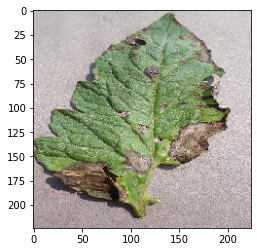

In [ ]:

  # predict images
  path = 'C:/Users/raghw/Downloads/projects/Tomato_Leaf_Disease_Detection/Datasets/' 
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = modelvgg19.predict(x)
  preds=np.argmax(preds, axis=1)
  if preds==0:
        preds="Tomato___Bacterial_spot"
  elif preds==1:
        preds="Tomato___Early_blight"
  elif preds==2:
        preds="Tomato___healthy"
  elif preds==3:
        preds="Tomato___Late_blight"
  elif preds==4:
        preds="Tomato___Leaf_Mold"
  elif preds==5:
        preds="Tomato___Septoria_leaf_spot"
  elif preds==6:
        preds="Tomato___Spider_mites Two-spotted_spider_mite"
  elif preds==7:
        preds="Tomato___Target_Spot"
  elif preds==8:
        preds="Tomato___Tomato_mosaic_virus"
  else:
        preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
  print(preds)
  plt.imshow(img)